<a href="https://colab.research.google.com/github/Diveesha909/BiokindAnalytics/blob/main/final_biokind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Datasets"

AccountsWithoutTransactions.csv  LYBUNT.csv		online_donations.csv  zcta
active_recurring_donations.csv	 offline_donations.csv	tl_2024_us_state      zipcodes_us.csv


In [ ]:
def filter_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df


# Online donor analysis

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
# df_account=pd.read_csv('AccountsWithoutTransactions.csv')
# df_active=pd.read_csv('active_recurring_donations.csv')
df_LYBUNT=pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/LYBUNT.csv')
df_offline=pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/offline_donations.csv')
df_online=pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/online_donations.csv')

In [ ]:
df_online['Donation Date'] = pd.to_datetime(df_offline['Donation Date'])
df_online['Year'] = df_online['Donation Date'].dt.year
df_online['Month'] = df_online['Donation Date'].dt.month
df_online['Month Name'] = df_online['Donation Date'].dt.month_name()  # Month name
df_online['Day'] = df_online['Donation Date'].dt.day
df_online['Day Name'] = df_online['Donation Date'].dt.day_name()  # Day name
df_online['Hour'] = df_online['Donation Date'].dt.hour

Maximum amount of donations by individuals was in May, and November.

In [ ]:
df_online['Account Type'].value_counts()

,count
Account Type,
Individual,7251
Company,2


There are only 2 companies that donated online and hence this is very negliable? How can we get more companies to donate online? Why are there only 2 companies?

# How do current donations impact the next?




## Loading offline-online

In [ ]:
# load dataset
offline_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/offline_donations.csv')

print('Offline Donation Columns:')
print(offline_df.columns)

print('-----------------------------------------------------------------------')

# load dataset
online_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/online_donations.csv')

print('Online Donation Columns:')
print(online_df.columns)

offline_df['Donation Type'] = 'Offline'
offline_df['online'] = 0

online_df['Donation Type'] = 'Online'
online_df['online'] = 1

online_offline_df = pd.concat([offline_df, online_df], ignore_index=True)
print(online_offline_df.head())

Offline Donation Columns:
Index(['Donation ID', 'Account ID', 'Shopping Cart ID', 'Campaign ID',
       'Donation Amount', 'Donation Date', 'Account Type', 'Full Name (F)',
       'Company Name', 'Address Line 1', 'City', 'State/Province', 'Zip Code',
       'Campaign Name', 'Purpose', 'Fund', 'Tender Type',
       'Tribute Full Name (F)', 'Unnamed: 18'],
      dtype='object')
-----------------------------------------------------------------------
Online Donation Columns:
Index(['Donation ID', 'Account ID', 'Shopping Cart ID', 'Campaign ID',
       'Donation Amount', 'Donation Date', 'Account Type', 'Full Name (F)',
       'Company Name', 'Address Line 1', 'City', 'State/Province', 'Zip Code',
       'Campaign Name', 'Purpose', 'Fund', 'Tender Type',
       'Tribute Full Name (F)', 'Unnamed: 18'],
      dtype='object')
   Donation ID  Account ID  Shopping Cart ID  Campaign ID  Donation Amount  \
0         5862        5122              5914           13           595.00   
1         812

In [ ]:
import pandas as pd

# Assuming `df` is the DataFrame containing the data
# Step 1: Count donations per account
account_donation_counts = online_df.groupby('Account ID').size().reset_index(name='Donation Count')

# Step 2: Filter accounts with more than one donation
multi_donation_accounts = account_donation_counts[account_donation_counts['Donation Count'] > 1]

# Step 3: Filter the original DataFrame
filtered_df = online_offline_df[online_offline_df['Account ID'].isin(multi_donation_accounts['Account ID'])] # Onetime donor list

# Display the result
print(filtered_df)


      Donation ID  Account ID  Shopping Cart ID  Campaign ID  Donation Amount  \
22           8678        3903              8758           18            25.00   
23           8679        3903              8759           18            80.00   
24           8698        3903              8778           18           155.45   
25           8749        3903              8829           18            25.00   
26           8772        3903              8852           18            80.00   
...           ...         ...               ...          ...              ...   
9486         5624        1468              5676           13            51.85   
9494         6144         526              6196           13           103.39   
9495          628         526               661            6           103.30   
9497         7599        2096              7679           17           103.60   
9498         2203        2096              2236            6            51.80   

     Donation Date Account 

In [ ]:
import pandas as pd

# Assuming `filtered_df` is the DataFrame from the previous step
# Step 1: Ensure Donation Date is in datetime format
filtered_df['Donation Date'] = pd.to_datetime(filtered_df['Donation Date'])

# Step 2: Group by Account ID and sort by Donation Date
sorted_df = filtered_df.sort_values(by=['Account ID', 'Donation Date'])

# Step 3: Calculate the difference in Donation Amount for each Account ID
sorted_df['Donation Difference'] = sorted_df.groupby('Account ID')['Donation Amount'].diff()

# Display the result
sorted_df


<ipython-input-20-de4e65656f5a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Donation ID,Account ID,Shopping Cart ID,Campaign ID,Donation Amount,Donation Date,Account Type,Full Name (F),Company Name,Address Line 1,...,Zip Code,Campaign Name,Purpose,Fund,Tender Type,Tribute Full Name (F),Unnamed: 18,Donation Type,online,Donation Difference
6973,2658,12,2691,5,405.05,2021-04-13,Individual,Maggie Ostrowski,QPS,3358 Swinburne Drive,...,53558,2021 Annual Campaign,General Operating,NaN,E-Check/ACH,NaN,NaN,Online,1,NaN
6974,2921,12,2973,5,700.62,2021-12-13,Individual,Maggie Ostrowski,QPS,3358 Swinburne Drive,...,53558,2021 Annual Campaign,General Operating,NaN,Credit Card (Online),NaN,NaN,Online,1,295.57
7452,17,32,29,1,25.00,2018-12-05,Individual,Ashley Riha,NaN,NaN,...,53561-9400,2018 Annual Campaign,General Operating,Unrestricted,Credit Card (Online),NaN,NaN,Online,1,NaN
7453,1636,32,1669,6,102.02,2021-02-25,Individual,Ashley Riha,NaN,NaN,...,53561-9400,2021 NBC 15 Community Diaper Drive,General Operating,Unrestricted,E-Check/ACH,NaN,NaN,Online,1,77.02
7286,28,54,52,1,300.00,2018-12-26,Individual,Liz Quinn,Liz Quinn Homes,810 Oneida Pl,...,53711,2018 Annual Campaign,General Operating,Unrestricted,Credit Card (Online),NaN,NaN,Online,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,9493,7378,9573,16,200.00,2024-12-03,Individual,Joseph Rausch,NaN,2837 Interlaken Pass,...,53719,2024 Annual Campaign,General Operating,Unrestricted,Credit Card (Online),NaN,NaN,Online,1,0.00
8581,8530,7447,8610,17,310.52,2024-02-23,Individual,Tara Swalve,NaN,5662 Cottontail Dr,...,53597,2024 WMTV Diaper Drive,General Operating,Unrestricted,Credit Card (Online),NaN,NaN,Online,1,NaN
8582,8528,7447,8608,17,310.20,2024-02-23,Individual,Tara Swalve,NaN,5662 Cottontail Dr,...,53597,2024 WMTV Diaper Drive,General Operating,Unrestricted,Credit Card (Online),NaN,NaN,Online,1,-0.32
2530,9401,7811,9481,16,1033.26,2024-10-11,Individual,Amanda Bardosy,Clasen Quality Chocolate,5126 W Terrace Dr,...,53718,2024 Annual Campaign,General Operating,Unrestricted,Credit Card (Online),NaN,NaN,Online,1,NaN


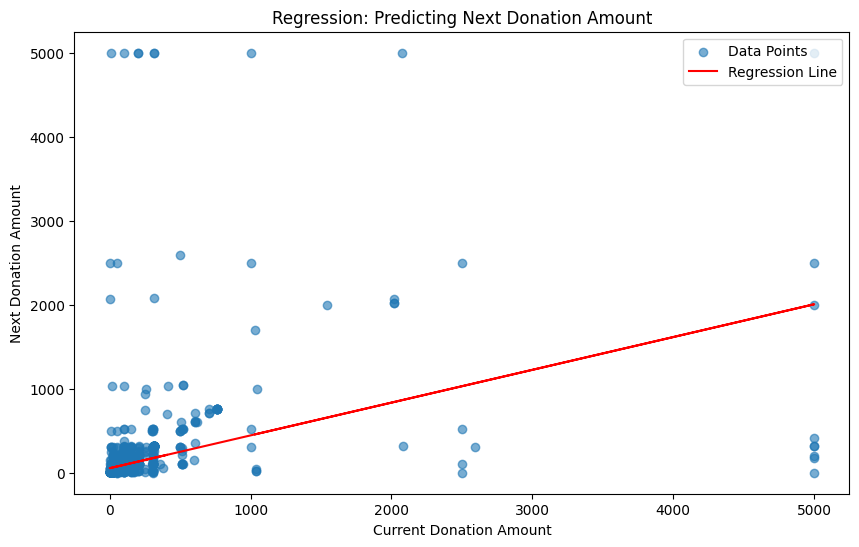

                             OLS Regression Results                             
Dep. Variable:     Next Donation Amount   R-squared:                       0.146
Model:                              OLS   Adj. R-squared:                  0.146
Method:                   Least Squares   F-statistic:                     609.3
Date:                  Thu, 30 Jan 2025   Prob (F-statistic):          2.55e-124
Time:                          05:42:26   Log-Likelihood:                -25082.
No. Observations:                  3565   AIC:                         5.017e+04
Df Residuals:                      3563   BIC:                         5.018e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              53.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming `sorted_df` is the DataFrame from the previous step
# Step 1: Shift donation amounts to get the next donation
sorted_df['Next Donation Amount'] = sorted_df.groupby('Account ID')['Donation Amount'].shift(-1)

# Drop rows where Next Donation Amount is NaN
regression_df = sorted_df.dropna(subset=['Donation Amount', 'Next Donation Amount'])

# Step 2: Set up the regression model
X = regression_df['Donation Amount']
y = regression_df['Next Donation Amount']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Step 3: Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(regression_df['Donation Amount'], regression_df['Next Donation Amount'], label='Data Points', alpha=0.6)
plt.plot(regression_df['Donation Amount'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Current Donation Amount')
plt.ylabel('Next Donation Amount')
plt.title('Regression: Predicting Next Donation Amount')
plt.legend()
plt.show()

# Print summary statistics
print(model.summary())


\A donor is expected to increase their donation by $40 for every $100 they donate.


We see that there is as the number of donations go up, the amount they donate

becomes lesser. We see a decreasing trend.

In [ ]:
online_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/online_donations.csv')
offline_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/offline_donations.csv')

offline_df['Donation Type'] = 'Offline'
# Add a binary indicator column where 0 signifies that the donation is offline.
offline_df['online'] = 0


online_df['Donation Type'] = 'Online'
# Add a binary column where 1 signifies that the donation type is online.
online_df['online'] = 1

# Adding a binary indicator was to simplify comparisons or aggregrations while performing linear regression.
# getting the year
online_df['Donation Date'] = pd.to_datetime(online_df['Donation Date'])
online_df['Year'] = online_df['Donation Date'].dt.year
offline_df['Donation Date'] = pd.to_datetime(offline_df['Donation Date'])
offline_df['Year'] = offline_df['Donation Date'].dt.year

online_offline_df = pd.concat([offline_df, online_df], ignore_index=True)
online_offline_df.head()

online_offline_donators = online_offline_df.groupby(['Account ID', 'Year']).agg(
    Total_Donation_Amount=('Donation Amount', 'sum'),
    Total_Donations=('Account ID', 'count')
).reset_index()

online_offline_donators['Company'] = online_offline_df.groupby(['Account ID', 'Year'])['Account Type'].transform(lambda x: 1 if x.iloc[0] == 'Company' else 0)

online_offline_donators['Online'] = online_offline_df.groupby(['Account ID', 'Year'])['online'].transform(lambda x: x.iloc[0])

# # yearly_donations[(yearly_donations['Year'] >= 2020) & (yearly_donations['Year'] <= 2024)]
# online_donators
donators_22_24 = online_offline_donators[(online_offline_donators['Year'] == 2022) | (online_offline_donators['Year'] == 2024)]
repeat_donators_22_24 = donators_22_24[
    donators_22_24['Account ID'].isin(
        donators_22_24['Account ID'].value_counts()[lambda x: x >= 2].index
    )
]

repeat_donators_22_24

,Account ID,Year,Total_Donation_Amount,Total_Donations,Company,Online
61,78,2022,15181.35,5,0,0
63,78,2024,2200.00,11,0,0
91,102,2022,558.19,14,0,0
93,102,2024,236.34,14,0,0
106,114,2022,200.00,2,0,0
...,...,...,...,...,...,...
6634,5817,2024,25.00,1,0,1
6676,5867,2022,100.00,1,0,1
6678,5867,2024,75.00,1,0,1
6937,6562,2022,205.45,3,0,1


# Total donations in 2023 by frequency

In [ ]:
df_1=df_LYBUNT
len(df_1)


1064

In [ ]:
import pandas as pd
import plotly.express as px

# Convert '2023 Donation Amount' to numeric, handling errors
df_1['2023 Donation Amount'] = pd.to_numeric(df_1['2023 Donation Amount'], errors='coerce')

# Drop rows with invalid (NaN) donation amounts
df_1 = df_1.dropna(subset=['2023 Donation Amount'])

# Grouping '2023 Donation Amount' into numerical bins
df_1['Donation Amount Group'] = pd.cut(
    df_1['2023 Donation Count'],
    bins=[0,2,4,6,8,float('inf')],  # Adjust bins as needed
    labels=['0-2', '2-4', '4-6','6-8','8+']
)

# Group by 'Donation Amount Group' to calculate total donation amount for each group
donation_grouped = df_1.groupby('Donation Amount Group')['2023 Donation Amount'].sum().reset_index()

# Creating the bar plot
fig = px.pie(
    donation_grouped,
    names='Donation Amount Group',
    values='2023 Donation Amount',
    title='Total Donation in 2023 by frequency of donations',
    # color='Donation Amount Group',
    # text_auto=True  # Display the total donation amount on top of the bars
)

fig.update_layout(
    width=800,
    height=600
)

fig.show()


<ipython-input-14-07018d482f0c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Donation Amount Group'] = pd.cut(
<ipython-input-14-07018d482f0c>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  donation_grouped = df_1.groupby('Donation Amount Group')['2023 Donation Amount'].sum().reset_index()


The current number of donors from 2023 are mostly single time donors,they contributed to most of the donation amount.
Recommendation: encorage donation from recurring donors
Largest demographic are from single time so focus on them!

Make a piechart showing how 2-4 time donors donate more in the long run than 4-6 time donors. Total amount donated= entire pie, what percent of total donors came from 2-8 time donors. Include single time donors.

# 2023 Total Donation Amount from Onetime Donors by amount donated

In [ ]:
df_2=df_LYBUNT.loc[df_LYBUNT['2023 Donation Count'] == 1]
len(df_2)

978

In [ ]:
df_2['Numeric 2023 Donation Amount'] =df_2['2023 Donation Amount']
type(df_2['Numeric 2023 Donation Amount'][0])


<ipython-input-16-72c176859f2a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



numpy.float64

In [ ]:
import plotly.express as px
import pandas as pd

# ... (previous code to ensure numeric data type, drop missing values, and sort)

# Define donation amount categories (bins)
bins = [i for i in range(0, 500, 25)]   # Adjust as needed
labels = [f'{i}-{i + 25}' for i in bins[:-1]]
# Add a label for the last bin
labels[-1] = f'{bins[-2]}+'

# Create a new column with donation amount categories
df_2['Donation Category'] = pd.cut(
   df_2['Numeric 2023 Donation Amount'],
    bins=bins,
    labels=labels  ,
    include_lowest=True  # Include the lower bound of the first bin
)

# Group by donation category and calculate total donation amount
grouped_donations = df_2.groupby('Donation Category')['Numeric 2023 Donation Amount'].sum().reset_index()
# print(grouped_donations)

# Create the bar graph
fig = px.pie(
    grouped_donations,
    names='Donation Category',
    values='Numeric 2023 Donation Amount',
    title='2023 Total Donation Amount from Onetime Donors by amount donated',
    # text_auto=True
)

fig.update_layout(
    width=800,
    height=600,
)

fig.show()

<ipython-input-17-1f24eb59b66d>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-1f24eb59b66d>:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Percentage pie chart


Observations: There are two major groups of donors, 25% of the donors donate in the range of \$100-\$125, 36% of the donors donate in the range of \$25-\$75.